# Variable Star Analysis

In [596]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import QTable, Table, Column
import csv
import datetime as dt

# Importing the Data

In [597]:
Phot_data = pd.read_csv('rmaster_phot_v2.dat',delimiter='  ',names = ['ID', 'MAG', 'MERR', 'IMAGE'])
Date = open("dateobs.txt").readlines()
Time = pd.read_csv('hour.min.sec.txt',delimiter=':',names=['Hour','Min','Sec'])

C:\Users\fmart\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [598]:
starid = [a % 30 for a in Phot_data.ID] 

# Converting Calendar Date to Modified Julian Date

In [602]:
def JD (Hour, Min, Sec):
    return(2456846.5 + Hour*(.1/2.4) + Min*(.1/144) + Sec*(.1/8640))  
def MJD (Jul_Date):
    return(Jul_Date - 2400000.5)

In [603]:
Julian_Date = []                                                
Mod_Jul_Date = []
for i in range(len(Time)):
    Julian_Date.append(JD(Time.Hour[i],Time.Min[i],Time.Sec[i]))
    Mod_Jul_Date.append(MJD(Julian_Date[i]))
Mod_Jul_Date

[56846.04540509218,
 56846.050833333284,
 56846.05626157392,
 56846.06167824054,
 56846.067106481176,
 56846.072534722276,
 56846.07796296291,
 56846.08337963,
 56846.088807870634,
 56846.09422453726,
 56846.09965277789,
 56846.10508101899,
 56846.11049768515,
 56846.11592592625,
 56846.121354166884,
 56846.12677083304,
 56846.13219907414,
 56846.137627314776,
 56846.143136573955,
 56846.14857638907,
 56846.154074074235,
 56846.15961805545,
 56846.19981481461,
 56846.20524305524,
 56846.21067129634,
 56846.21608796297,
 56846.22151620407,
 56846.226932870224,
 56846.232361111324,
 56846.23777777795,
 56846.24320601858,
 56846.248622685205,
 56846.25405092584,
 56846.25946759246,
 56846.26489583356,
 56846.270312500186,
 56846.27574074082,
 56846.281157407444,
 56846.286585648544,
 56846.2920023147,
 56846.297430555336,
 56846.30362268537,
 56846.30905092554,
 56846.31446759263,
 56846.319895833265,
 56846.3253240739,
 56846.33074074052,
 56846.33616898162,
 56846.341585648246,
 56846.3

# Making the Binary  Light Curve

In [604]:
Light_curve = np.reshape(np.asarray(Phot_data.MAG), (53,30))
Light_curve  #Where the columns are the stars and the rows are the magnitude of that star taken at a certain time

array([[16.165, 13.629, 13.092, ..., 10.791, 12.38 , 13.645],
       [16.109, 13.601, 13.038, ..., 10.841, 12.36 , 13.653],
       [16.286, 13.593, 13.05 , ..., 10.812, 12.368, 13.614],
       ...,
       [16.113, 13.889, 13.282, ..., 10.966, 12.737, 13.88 ],
       [16.544, 14.352, 13.754, ..., 11.169, 13.128, 14.374],
       [16.307, 14.065, 13.487, ..., 11.137, 13.001, 14.092]])

In [605]:
Light_curve[:,0]   #This is the light curve for the binary star

array([16.165, 16.109, 16.286, 16.116, 16.131, 16.091, 16.043, 16.034,
       15.977, 15.844, 15.805, 15.826, 15.798, 15.827, 15.731, 15.77 ,
       15.596, 15.674, 15.725, 15.662, 15.69 , 15.697, 15.894, 15.887,
       15.912, 15.93 , 16.035, 16.104, 16.259, 16.234, 16.207, 16.071,
       15.915, 15.998, 16.113, 15.901, 15.822, 15.838, 15.775, 15.861,
       15.8  , 15.82 , 15.842, 15.827, 15.819, 15.858, 15.785, 15.977,
       16.097, 15.985, 16.113, 16.544, 16.307])

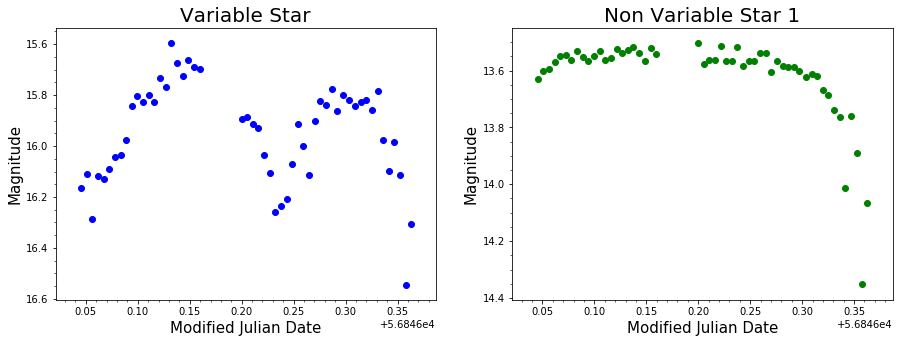

In [606]:
#Direct, side by side comparison with Variable star to Non Variable Star 1
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.scatter(Mod_Jul_Date,Light_curve[:,0], color = 'blue')
plt.gca().invert_yaxis()
plt.title("Variable Star",fontsize = 20)
plt.ylabel('Magnitude',fontsize = 15)
plt.xlabel('Modified Julian Date',fontsize = 15)
plt.minorticks_on()

plt.subplot(1,2,2)
plt.scatter(Mod_Jul_Date,Light_curve[:,1], color = 'green')
plt.gca().invert_yaxis()
plt.title("Non Variable Star 1",fontsize = 20)
plt.ylabel('Magnitude',fontsize = 15)
plt.xlabel('Modified Julian Date',fontsize = 15)
plt.minorticks_on()
plt.show()

# Standard Star Calibration

In [609]:
Star_avg = ((Light_curve[:,0]-Light_curve[:,1])+(Light_curve[:,0]-Light_curve[:,2])+(Light_curve[:,0]-Light_curve[:,3])+
                (Light_curve[:,0]-Light_curve[:,4])+(Light_curve[:,0]-Light_curve[:,5])+(Light_curve[:,0]-Light_curve[:,6])+
                (Light_curve[:,0]-Light_curve[:,7])+(Light_curve[:,0]-Light_curve[:,8])+(Light_curve[:,0]-Light_curve[:,9])+
                (Light_curve[:,0]-Light_curve[:,10])+(Light_curve[:,0]-Light_curve[:,11])+(Light_curve[:,0]-Light_curve[:,12])+
                (Light_curve[:,0]-Light_curve[:,13])+(Light_curve[:,0]-Light_curve[:,14])+(Light_curve[:,0]-Light_curve[:,15])+
                (Light_curve[:,0]-Light_curve[:,1+15])+(Light_curve[:,0]-Light_curve[:,2+15])+(Light_curve[:,0]-Light_curve[:,3+15])+
                (Light_curve[:,0]-Light_curve[:,4+15])+(Light_curve[:,0]-Light_curve[:,5+15])+(Light_curve[:,0]-Light_curve[:,6+15])+
                (Light_curve[:,0]-Light_curve[:,7+15])+(Light_curve[:,0]-Light_curve[:,8+15])+(Light_curve[:,0]-Light_curve[:,9+15])+
                (Light_curve[:,0]-Light_curve[:,10+15])+(Light_curve[:,0]-Light_curve[:,11+15])+(Light_curve[:,0]-Light_curve[:,12+15])+
                (Light_curve[:,0]-Light_curve[:,13+15])+(Light_curve[:,0]-Light_curve[:,14+15]))/30
#Averaging the difference between the Variable star and all of the standard stars

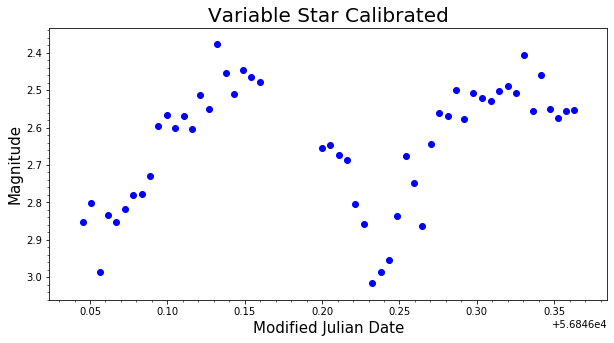

In [612]:
plt.figure(figsize = [10,5])
plt.scatter(Mod_Jul_Date,Star_avg, color = 'blue')
plt.gca().invert_yaxis()
plt.title("Variable Star Calibrated",fontsize = 20)
plt.ylabel('Magnitude',fontsize = 15)
plt.xlabel('Modified Julian Date',fontsize = 15)
plt.minorticks_on()